In [1]:
devtools::unload("rlang")

In [2]:
install.packages("bigrquery")

also installing the dependencies ‘curl’, ‘cli’, ‘tzdb’, ‘vctrs’, ‘cpp11’, ‘httr’, ‘clock’, ‘gargle’, ‘rlang’, ‘rapidjsonr’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
# Restart the Kernel

In [1]:
library(tidyverse)
library(DBI)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
con <- dbConnect(
  bigrquery::bigquery(),
  project = "cal-itp-data-infra" ,
  dataset = "mart_gtfs" #,
#  billing = "billing"
  )

In [3]:
install.packages('DT')

also installing the dependencies ‘lazyeval’, ‘crosstalk’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
library(stringr)
library(DT)

In [26]:
query1 = "select _vehicle_message_age
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages`
where
dt between '2024-06-12' and '2024-06-13'
and date(datetime(_extract_ts, 'America/Los_Angeles')) = '2024-06-12'
-- and time(datetime(_extract_ts, 'America/Los_Angeles')) = '17:00:00'
and _vehicle_message_age is not null"
Report1 = dbGetQuery(con, query1)
write.csv(Report1,"data/Report1.csv", row.names = FALSE)

In [27]:
Report1 = Report1 %>%
    select(Latency = `_vehicle_message_age`)

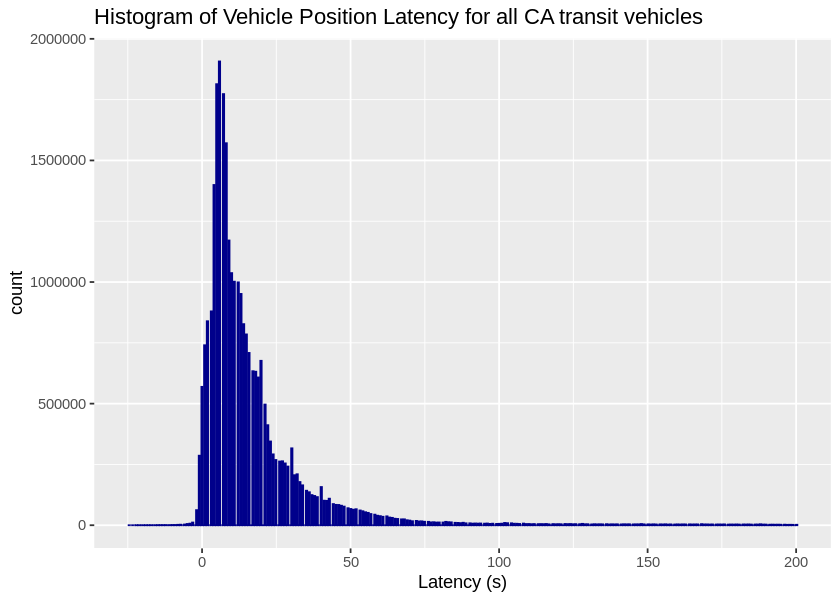

In [54]:
options(repr.plot.width = 7, repr.plot.height =5) 
Report1 %>% 
    filter(Latency <= 200) %>% 
    ggplot(aes(Latency)) +
    geom_histogram(bins = 500, color = 'darkblue') +
    ggtitle("Histogram of Vehicle Position Latency for all CA transit vehicles") +
    xlab("Latency (s)") 
              

In [30]:
median(Report1$Latency)

[1] 11

In [31]:
summary(Report1)

    Latency        
 Min.   :   -25.0  
 1st Qu.:     6.0  
 Median :    11.0  
 Mean   :   693.7  
 3rd Qu.:    21.0  
 Max.   :689920.0  

In [34]:
dim(Report1)

[1] 29555965        1

In [35]:
glimpse(Report1)

Rows: 29,555,965
Columns: 1
$ Latency <int> 47, 47, 53, 54, 41, 49, 55, 45, 53, 39, 56, 54, 56, 56, 49, 39…


In [30]:
query11 = "select _vehicle_message_age Latency
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages`
where
dt between '2024-10-16' and '2024-10-17'
and date(datetime(_extract_ts, 'America/Los_Angeles')) = '2024-10-16'
and _vehicle_message_age is not null"
Report11 = dbGetQuery(con, query11)
# write.csv(Report1,"data/Report1.csv", row.names = FALSE)

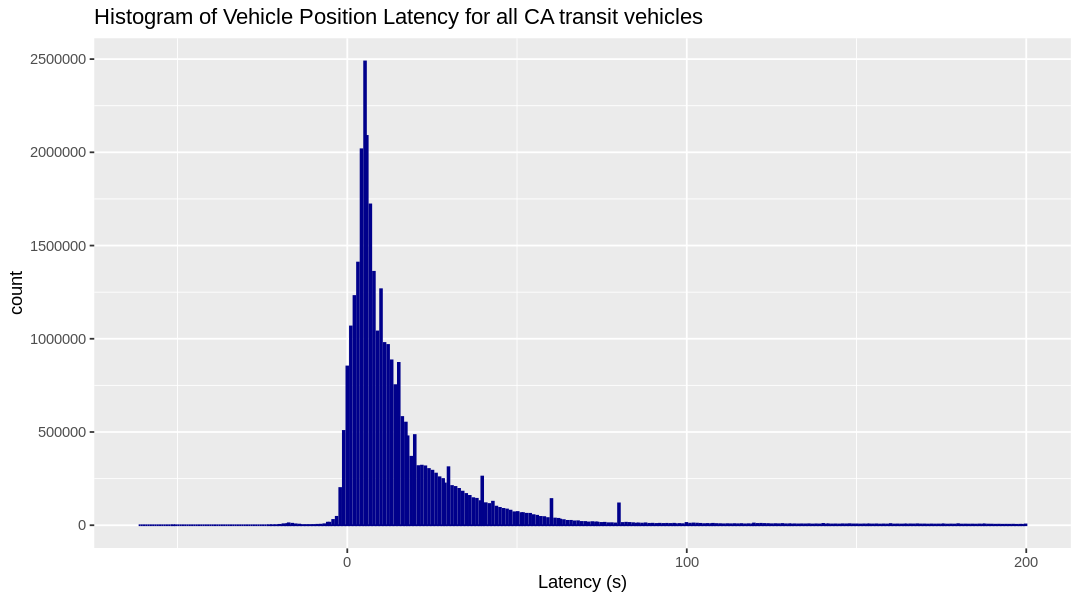

In [33]:
options(repr.plot.width = 9, repr.plot.height =5) 
Report11 %>% 
    filter(Latency <= 200) %>% 
    ggplot(aes(Latency)) +
    geom_histogram(bins = 500, color = 'darkblue') +
    ggtitle("Histogram of Vehicle Position Latency for all CA transit vehicles") +
    xlab("Latency (s)") 
              

In [32]:
summary(Report11)

    Latency       
 Min.   :    -61  
 1st Qu.:      5  
 Median :     10  
 Mean   :    669  
 3rd Qu.:     20  
 Max.   :6163730  

In [35]:
glimpse(Report11)

Rows: 32,373,265
Columns: 1
$ Latency <int> 1156, 158, 178, -4, -4, -3, 20081, 379, 258, 39, -3, -3, -3, 4…


In [5]:
query12 = "select _vehicle_message_age Latency, _header_message_age
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages`
where
dt between '2024-10-22' and '2024-10-23'
and date(datetime(_extract_ts, 'America/Los_Angeles')) = '2024-10-22'
and _vehicle_message_age is not null"
Report12 = dbGetQuery(con, query12)
saveRDS(Report12, "data/Report12.csv")

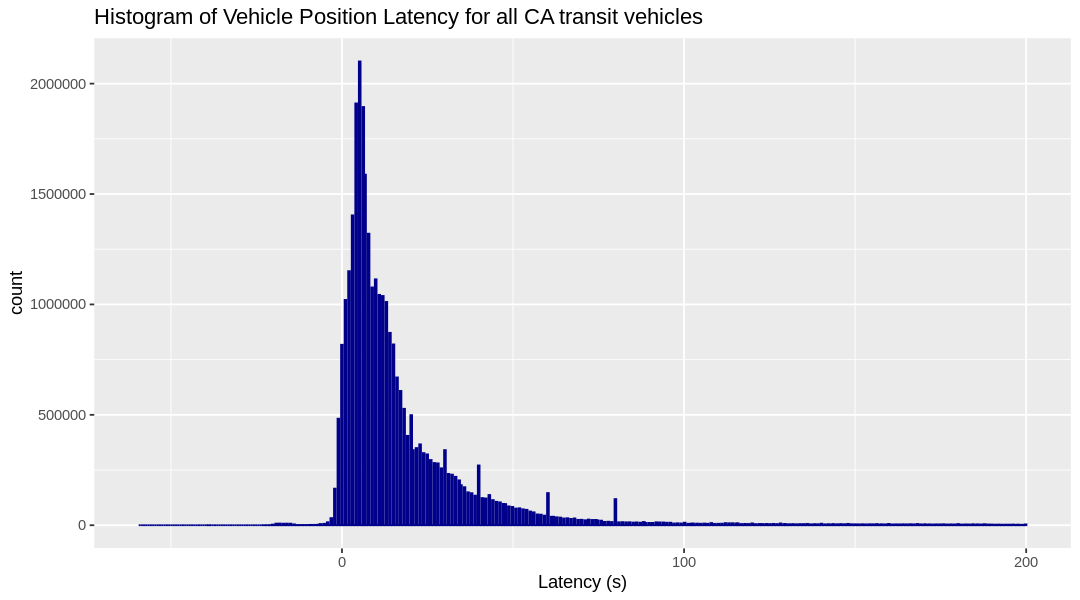

In [6]:
options(repr.plot.width = 9, repr.plot.height =5) 
Report12 %>% 
    filter(Latency <= 200) %>% 
    ggplot(aes(Latency)) +
    geom_histogram(bins = 500, color = 'darkblue') +
    ggtitle("Histogram of Vehicle Position Latency for all CA transit vehicles") +
    xlab("Latency (s)") 
              

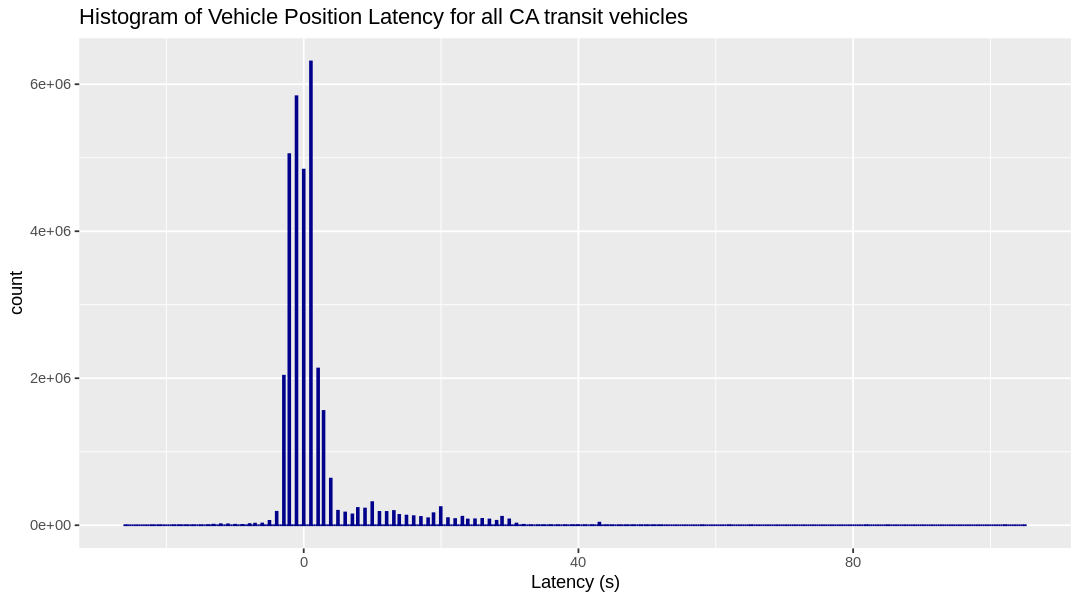

In [10]:
options(repr.plot.width = 9, repr.plot.height =5) 
Report12 %>% 
    # filter(Latency <= 150) %>% 
    ggplot(aes(`_header_message_age`)) +
    geom_histogram(bins = 500, color = 'darkblue') +
    ggtitle("Histogram of Vehicle Position Latency for all CA transit vehicles") +
    xlab("Latency (s)") 
              

In [7]:
summary(Report12)

    Latency        _header_message_age
 Min.   :    -59   Min.   :-26.000    
 1st Qu.:      5   1st Qu.: -1.000    
 Median :     11   Median :  0.000    
 Mean   :    645   Mean   :  1.638    
 3rd Qu.:     23   3rd Qu.:  1.000    
 Max.   :6699519   Max.   :105.000    

In [8]:
glimpse(Report12)

Rows: 32,550,287
Columns: 2
$ Latency               <int> 57, 50, 38, 190, 510, 43, 54, 44, 192, 203, 48, …
$ `_header_message_age` <int> 4, 4, 4, 4, 4, 0, 0, 0, 0, 2, -2, -2, -2, -2, -2…


In [47]:
query2 = "with cte1 as(
  select distinct gtfs_dataset_key
  from `cal-itp-data-infra.mart_transit_database.dim_gtfs_service_data`
  where customer_facing is true
),
cte2 as(
SELECT 
dt, 
_extract_ts,
vpm.gtfs_dataset_key,
_header_message_age, 
_vehicle_message_age,
_vehicle_message_age_vs_header,
datetime(_extract_ts, 'America/Los_Angeles') as _extract_ts_pacific, 
date(datetime(_extract_ts, 'America/Los_Angeles')) as dt_pacific,
time(datetime(_extract_ts, 'America/Los_Angeles')) as hour_pacific
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
inner join cte1 c1
on vpm.gtfs_dataset_key = c1.gtfs_dataset_key
where 
gtfs_dataset_name not like 'Bay Area 511%'
and trip_id is not null

and (dt between '2024-06-09' and '2024-06-16')
and date(datetime(_extract_ts, 'America/Los_Angeles')) between '2024-06-09' and '2024-06-15'
),
cte3 as(
select 
dt_pacific, 
-- _header_message_age, 
-- _vehicle_message_age,
-- _vehicle_message_age_vs_header,
PERCENTILE_CONT(_vehicle_message_age, .5) OVER(PARTITION BY dt_pacific) AS median_vehicle_message_age
from cte2
)

select distinct *
 from cte3
"
Report2 = dbGetQuery(con, query2)
# write.csv(df2,"data/df2.csv", row.names = FALSE)

In [49]:
Report2

dt_pacific median_vehicle_message_age
1 2024-06-15 8                         
2 2024-06-11 9                         
3 2024-06-09 8                         
4 2024-06-12 9                         
5 2024-06-14 9                         
6 2024-06-10 9                         
7 2024-06-13 9

In [52]:
query3 = "with 
cte2 as(
SELECT 
dt, 
_extract_ts,
vpm.gtfs_dataset_key,
_header_message_age, 
_vehicle_message_age,
_vehicle_message_age_vs_header,
datetime(_extract_ts, 'America/Los_Angeles') as _extract_ts_pacific, 
date(datetime(_extract_ts, 'America/Los_Angeles')) as dt_pacific,
time(datetime(_extract_ts, 'America/Los_Angeles')) as hour_pacific
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
where
(dt between '2024-06-09' and '2024-06-16')
and date(datetime(_extract_ts, 'America/Los_Angeles')) between '2024-06-09' and '2024-06-15'
and _vehicle_message_age is not null
),
cte3 as(
select 
dt_pacific, 
-- _header_message_age, 
-- _vehicle_message_age,
-- _vehicle_message_age_vs_header,
PERCENTILE_CONT(_vehicle_message_age, .5) OVER(PARTITION BY dt_pacific) AS median_vehicle_message_age
from cte2
)

select distinct *
 from cte3
"
Report3 = dbGetQuery(con, query3)
# write.csv(df2,"data/df2.csv", row.names = FALSE)

In [53]:
Report3

dt_pacific median_vehicle_message_age
1 2024-06-12 11                        
2 2024-06-09 11                        
3 2024-06-11 11                        
4 2024-06-10 11                        
5 2024-06-14 11                        
6 2024-06-13 11                        
7 2024-06-15 11

In [63]:
query5 = "with 
cte2 as(
SELECT 
gtfs_dataset_name Agency, 
_vehicle_message_age Latency,
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
where 
gtfs_dataset_name not like 'Bay Area 511%'
and dt between '2024-08-21' and '2024-08-22'
and date(datetime(_extract_ts, 'America/Los_Angeles')) = '2024-08-21'
and _vehicle_message_age is not null
)

select *
from cte2"
Report5 = dbGetQuery(con, query5)
#write.csv(df41,"data/df41.csv", row.names = FALSE)

In [66]:
glimpse(Report5)

Rows: 17,516,693
Columns: 2
$ Agency  <chr> "San Diego Vehicle Positions", "San Diego Vehicle Positions", …
$ Latency <int> 69, 71, 66, 74, 43, 57, 70, 69, 71, 61, 73, 64, 68, 65, 45, 84…


In [67]:
summary(Report5)

    Agency             Latency         
 Length:17516693    Min.   :    -51.0  
 Class :character   1st Qu.:      5.0  
 Mode  :character   Median :      9.0  
                    Mean   :    253.3  
                    3rd Qu.:     31.0  
                    Max.   :1337259.0  

In [73]:
Report5 %>% 
    distinct(Agency)

Agency                                             
1  San Diego Vehicle Positions                        
2  AC Transit VehiclePositions                        
3  OCTA VehiclePositions                              
4  Victor Valley Vehicle Position                     
5  Bear Vehicle Positions                             
6  Turlock Vehicle Positions                          
7  Torrance Swiftly Vehicle Positions                 
8  Lake Vehicle Positions                             
9  Burbank VehiclePositions                           
10 Sacramento Vehicle Positions                       
11 LA DOT VehiclePositions                            
12 Petaluma GMV Vehicle Positions                     
13 Tahoe Transportation District GMV VehiclePositions 
14 Unitrans Vehicle Positions                         
15 PresidiGo VehiclePositions                         
16 G Trans Vehicle Positions                          
17 Beaumont Pass Vehicle Positions                    
18 Santa Rosa CityBus GMV VehiclePositions            
19 Vine GMV Vehicle Positions                         
20 Culver City VehiclePositions                       
21 GET VehiclePositions                               
22 Union City Vehicle Positions                       
23 Torrance Vehicle Positions                         
24 SBMTD VehiclePositions                             
25 Metrolink VehiclePositions                         
26 Madera County Connection Vehicle Positions         
27 Redwood Coast Vehicle Positions                    
28 Banning Pass Vehicle Positions                     
29 SunLine Vehicle Positions                          
30 WeHo Vehicle Positions                             
⋮  ⋮                                                  
57 San Francisco Bay Ferry Vehicle Positions          
58 Emery Go-Round TripShot Vehicle Positions          
59 LA Metro Rail Vehicle Positions                    
60 Irvine CONNECT Vehicle Positions                   
61 Yolobus Vehicle Positions                          
62 Merced VehiclePositions                            
63 SMART Vehicle Positions                            
64 SLORTA VehiclePositions                            
65 Montebello Vehicle Positions                       
66 OmniTrans Vehicle Positions                        
67 Antelope Valley Transit Authority Vehicle Positions
68 StanRTA Vehicle Positions                          
69 Monterey Salinas VehiclePositions                  
70 Elk Grove VehiclePositions                         
71 Roseville Transit GMV VehiclePositions             
72 SolTrans Vehicle Positions                         
73 Humboldt Vehicle Positions                         
74 BruinBus Vehicle Positions                         
75 North County Vehicle Positions                     
76 Redding Vehicle Positions                          
77 Pasadena VehiclePositions                          
78 San Joaquin Vehicle Positions                      
79 Santa Maria Vehicle Positions                      
80 TCRTA Vehicle Positions                            
81 Anaheim Resort VehiclePositions                    
82 Norwalk Vehicle Positions                          
83 Long Beach VehiclePositions                        
84 Fresno Vehicle Positions                           
85 Riverside VehiclePositions                         
86 LA Metro Bus Vehicle Positions

In [6]:
# query6 = "with cte1 as(
#   select distinct gtfs_dataset_key
#   from `cal-itp-data-infra.mart_transit_database.dim_gtfs_service_data`
#   where customer_facing is true
# ),
# cte2 as(
# SELECT 
# gtfs_dataset_name Agency, 
# _vehicle_message_age Latency,
# from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
# inner join cte1
# on vpm.gtfs_dataset_key = cte1.gtfs_dataset_key
# where 
# gtfs_dataset_name not like 'Bay Area 511%'
# and dt between '2024-08-21' and '2024-08-22'
# and date(datetime(_extract_ts, 'America/Los_Angeles')) = '2024-08-21'
# and _vehicle_message_age is not null
# )

# select *
# from cte2"
# Report6 = dbGetQuery(con, query6)
# saveRDS(Report6, "data/Report6.rds")

In [5]:
Report6 = readRDS("data/Report6.rds")

In [8]:
glimpse(Report6)

Rows: 15,623,970
Columns: 2
$ Agency  <chr> "LA Metro Bus Vehicle Positions", "LA Metro Bus Vehicle Positi…
$ Latency <int> 78, 514, 166, 289, 266, 128, 97, 570, 337, 117, 504, 204, 110,…


In [9]:
summary(Report6)

    Agency             Latency         
 Length:15623970    Min.   :    -51.0  
 Class :character   1st Qu.:      5.0  
 Mode  :character   Median :      8.0  
                    Mean   :    199.2  
                    3rd Qu.:     29.0  
                    Max.   :1337259.0  

In [ ]:
# Report6 %>%
#     ggplot(aes(reorder(Agency, Latency), Latency)) +
#     geom_boxplot()+
#     coord_flip()

In [8]:
Report7 = Report6 %>%
    group_by(Agency) %>% 
    summarize(Min = min(Latency), 
              `%25` = quantile(Latency, .25),
              Median = median(Latency), 
              Average = round(mean(Latency), 1),
              `%75` = quantile(Latency, .75),
              Max = max(Latency),
             ) %>% 
    datatable(class = 'cell-border stripe', 
              options = list(pageLength = 100, dom = 't'),
              caption = 'Vehicle Position Message Statistics by Transit Agency'
             )
Report7

HTML widgets cannot be represented in plain text (need html)

In [9]:
query8 = "with cte1 as(
  select distinct gtfs_dataset_key
  from `cal-itp-data-infra.mart_transit_database.dim_gtfs_service_data`
  where customer_facing is true
),
cte2 as(
SELECT 
gtfs_dataset_name Agency, 
_vehicle_message_age Latency,
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
inner join cte1
on vpm.gtfs_dataset_key = cte1.gtfs_dataset_key
where 
gtfs_dataset_name not like 'Bay Area 511%'
and dt between '2024-10-16' and '2024-10-17'
and date(datetime(_extract_ts, 'America/Los_Angeles')) = '2024-10-16'
and _vehicle_message_age is not null
)

select *
from cte2"
Report8 = dbGetQuery(con, query8)
saveRDS(Report8, "data/Report8.rds")

In [10]:
Report8 = readRDS("data/Report8.rds")

In [11]:
glimpse(Report8)

Rows: 15,883,073
Columns: 2
$ Agency  <chr> "Nevada County Vehicle Positions", "Nevada County Vehicle Posi…
$ Latency <int> 258, 498, 578, 493, 553, 53, 48, 49, 49, 91, 231, 271, 331, 13…


In [12]:
summary(Report8)

    Agency             Latency       
 Length:15883073    Min.   :    -61  
 Class :character   1st Qu.:      5  
 Mode  :character   Median :      8  
                    Mean   :   1314  
                    3rd Qu.:     31  
                    Max.   :6163730  

In [16]:
Report9 = Report8 %>%
    group_by(Agency) %>% 
    summarize(Min = min(Latency), 
              `%25` = quantile(Latency, .25),
              Median = median(Latency), 
              Average = round(mean(Latency), 1),
              `%75` = quantile(Latency, .75),
              Max = max(Latency),
             ) 
Report9 %>% 
    datatable(class = 'cell-border stripe', 
              options = list(pageLength = 100, dom = 't'),
              caption = 'Vehicle Position Message Statistics by Transit Agency'
             )


HTML widgets cannot be represented in plain text (need html)

In [18]:
Report9$Agency= Report9$Agency %>% str_replace(" Vehicle Positions", "")
Report9$Agency= Report9$Agency %>% str_replace(" Vehicle Position", "")
Report9$Agency= Report9$Agency %>% str_replace(" VehiclePositions", "")
Report9$Agency= Report9$Agency %>% str_replace(" VehiclePosition", "")
Report9 %>% 
    datatable(class = 'cell-border stripe', 
              options = list(pageLength = 100, dom = 't'),
              caption = 'Vehicle Position Message Statistics by Transit Agency'
             )


HTML widgets cannot be represented in plain text (need html)

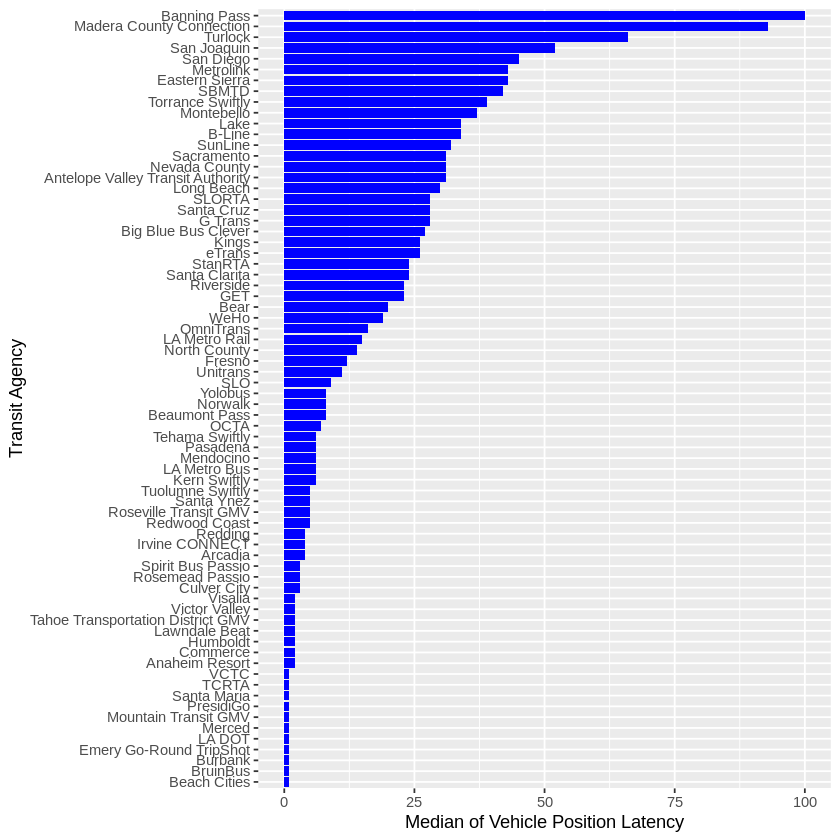

In [25]:
Report9 %>% 
    filter(
        Median < 1000,
        Median > 0
        ) %>% 
    ggplot(aes(reorder(Agency, Median), Median)) +
    geom_bar(stat = 'identity', fill = "blue") +
    xlab("Transit Agency") +
    ylab("Median of Vehicle Position Latency") +
    # theme(axis.text.x = element_text(angle = 90)) +
    coord_flip()


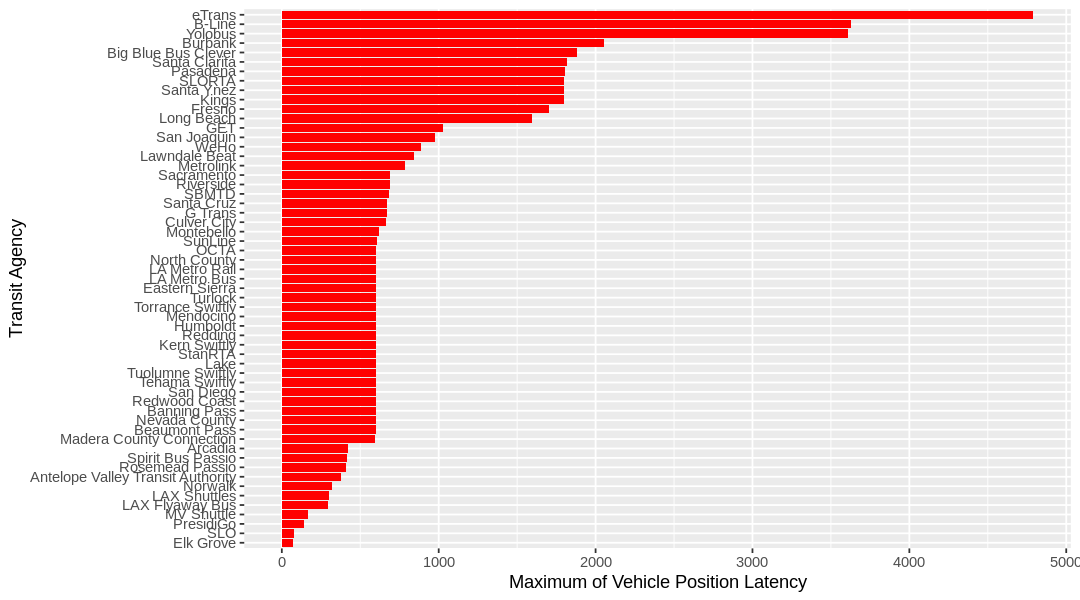

In [41]:
Report9 %>% 
    filter(
        Max < 10000,
        Max > 10
        ) %>% 
    ggplot(aes(reorder(Agency, Max), Max)) +
    geom_bar(stat = 'identity', fill = "red") +
    xlab("Transit Agency") +
    ylab("Maximum of Vehicle Position Latency") +
    # theme(axis.text.x = element_text(angle = 90)) +
    coord_flip()


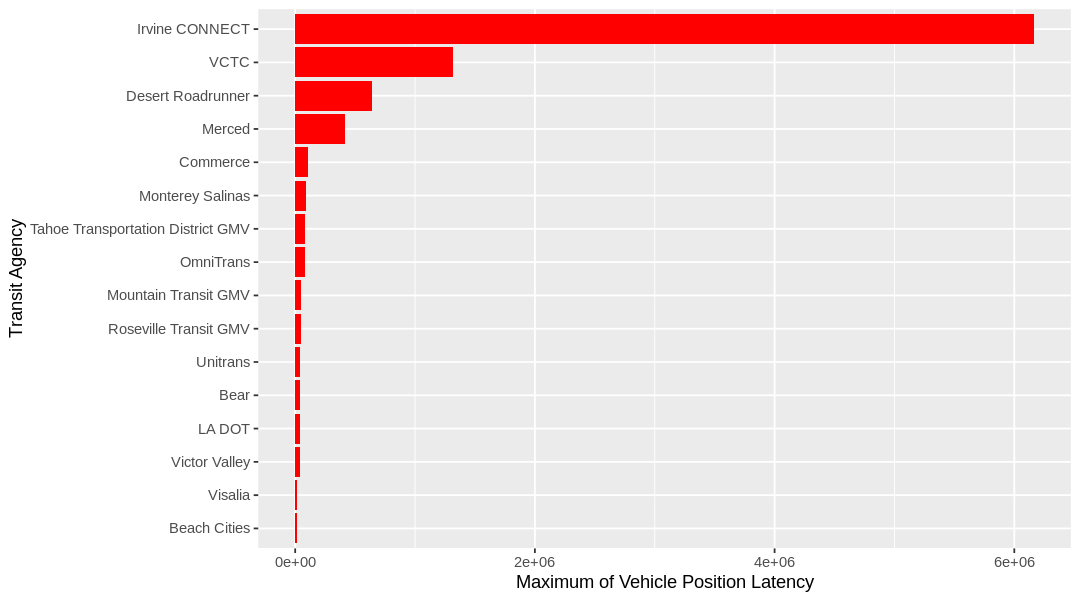

In [39]:
Report9 %>% 
    filter(
        # Max < 2000000,
        Max > 10000
        ) %>% 
    ggplot(aes(reorder(Agency, Max), Max)) +
    geom_bar(stat = 'identity', fill = "red") +
    xlab("Transit Agency") +
    ylab("Maximum of Vehicle Position Latency") +
    # theme(axis.text.x = element_text(angle = 90)) +
    coord_flip()


In [ ]:
Report8 %>% 
    filter(Agency = "Desert Roadrunner Vehicle Positions") %>% 
    
    
           

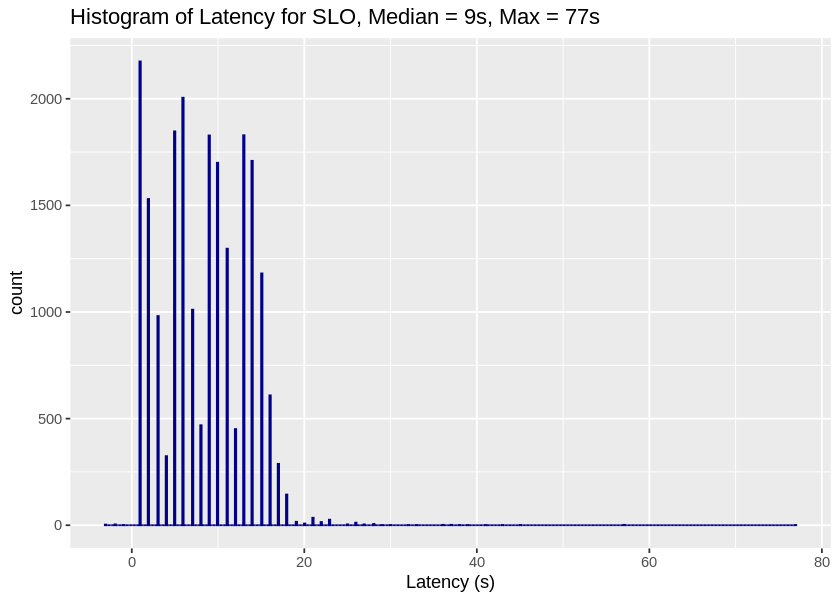

In [71]:
options(repr.plot.width = 7, repr.plot.height =5) 
Report8 %>% 
    filter(Agency == "SLO Vehicle Positions") %>% 
    # filter(Latency <= 400) %>% 
    ggplot(aes(Latency)) +
    geom_histogram(bins = 500, color = 'darkblue') +
    ggtitle("Histogram of Latency for SLO, Median = 9s, Max = 77s") +
    xlab("Latency (s)") 
              

In [30]:
median(Report1$Latency)

[1] 11

In [31]:
summary(Report1)

    Latency        
 Min.   :   -25.0  
 1st Qu.:     6.0  
 Median :    11.0  
 Mean   :   693.7  
 3rd Qu.:    21.0  
 Max.   :689920.0  

In [34]:
dim(Report1)

[1] 29555965        1

In [35]:
glimpse(Report1)

Rows: 29,555,965
Columns: 1
$ Latency <int> 47, 47, 53, 54, 41, 49, 55, 45, 53, 39, 56, 54, 56, 56, 49, 39…
